iPhone Sentiment Analysis EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
from collections import Counter
from wordcloud import WordCloud
warnings.filterwarnings(action="ignore")

In [38]:
df=pd.read_csv("iphone.csv")
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [39]:
print(f"Rows : {df.shape[0]} , columns : {df.shape[1]}")

Rows : 3062 , columns : 11


In [40]:
if df.isnull().sum().sum()-0:
    print("There is missing values in dataframe")
else:
    print("There is no missing values in data frame")

There is missing values in dataframe


In [41]:
if df.duplicated().sum()-0:
    print("There are duplicate values in dataframe")
else:
    print("There are no duplicate values in dataframe.")

There are no duplicate values in dataframe.


In [42]:
df.dropna(inplace=True)

In [43]:
df["productfrequency"]=df.groupby("productAsin")["productAsin"].transform('count')
df["variantpopularity"]=df.groupby("variantAsin")["variantAsin"].transform("count")

df["date"]=pd.to_datetime(df["date"], format = "%d-%m-%Y")
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df.drop(columns=["productAsin","variantAsin","date","reviewUrl"],inplace=True)
df.head()

,country,isVerified,ratingScore,reviewTitle,reviewDescription,reviewedIn,variant,productfrequency,variantpopularity,year,month,day
0,India,True,4,No charger,"Every thing is good about iPhones, there's not...",Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,565,105,2024,8,11
1,India,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,565,105,2024,8,16
2,India,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,565,105,2024,5,14
3,India,True,5,Product,100% genuine,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,565,105,2024,6,24
4,India,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,565,105,2024,5,18


In [44]:
df["IsPositiveRating"]=df["ratingScore"].apply (lambda x : 1 if x>=4 else 0)
df["RatingCategory"]= df["ratingScore"].apply (lambda x :"Low" if x<=2 else ("Medium" if x== 3  else "High"))
df.head()

,country,isVerified,ratingScore,reviewTitle,reviewDescription,reviewedIn,variant,productfrequency,variantpopularity,year,month,day,IsPositiveRating,RatingCategory
0,India,True,4,No charger,"Every thing is good about iPhones, there's not...",Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,565,105,2024,8,11,1,High
1,India,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,565,105,2024,8,16,1,High
2,India,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,565,105,2024,5,14,1,High
3,India,True,5,Product,100% genuine,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,565,105,2024,6,24,1,High
4,India,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,565,105,2024,5,18,1,High


In [45]:
# regular expression
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
def text_preprocessing(text):
    #convert to lower case

    text=text.lower()
    
    text=re.sub(r'<.*?|[^\x00-\x7f]','',text)
    
    text=re.sub(f'[{re.escape(string.punctuation)}]'," ",text)
    
    stop_words = set(stopwords.words("english"))
    words=[words for words in text.split() if words not in stop_words]
    
    cleanned_text=" ".join(words)
    
    return cleanned_text

In [47]:
df["reviewTitle"]=df["reviewTitle"].apply(text_preprocessing)

df["reviewDescription"]=df["reviewDescription"].apply(text_preprocessing)

df["reviewedIn"]=df["reviewedIn"].apply(text_preprocessing)

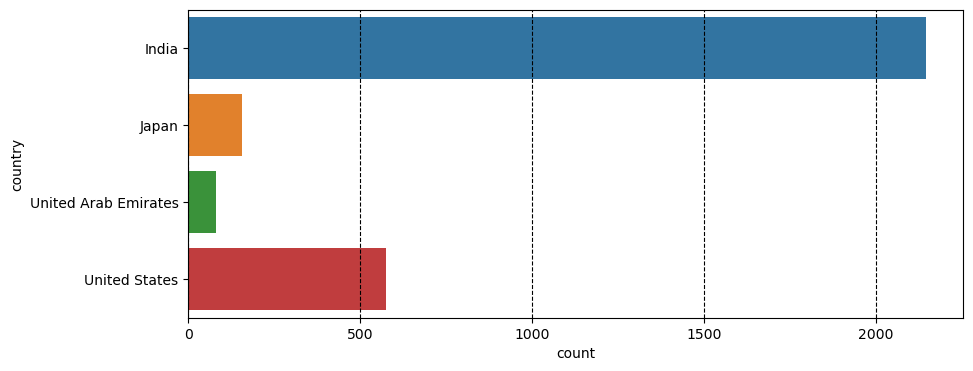

In [49]:
plt.figure(figsize=(10, 4))
ax=sns.countplot(y="country",data=df)
plt.grid(axis='x',linestyle="--",color="black")
plt.show()

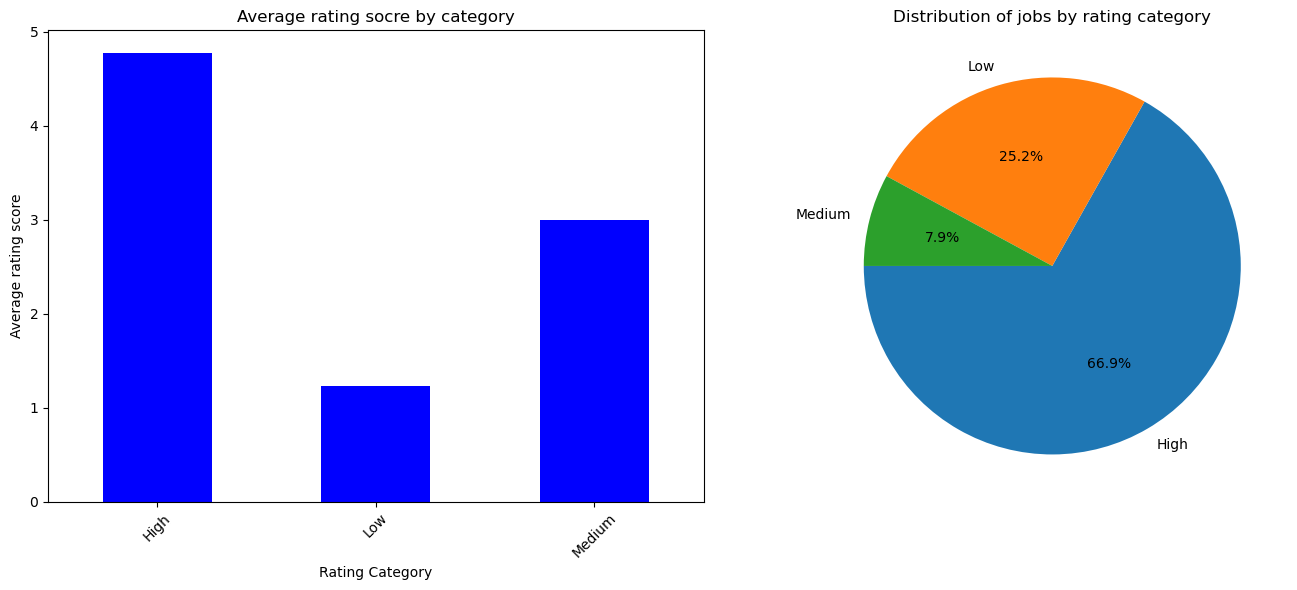

In [82]:
fig, axs =plt.subplots(1,2, figsize=(14,6))

#calculate average rating per category
avg_rating_per_category=df.groupby("RatingCategory")["ratingScore"].mean()

#Bar plot for average rating per category

avg_rating_per_category.plot(kind='bar',ax=axs[0],color='blue')
axs[0].set_xlabel('Rating Category')
axs[0].set_ylabel('Average rating score')
axs[0].set_title('Average rating socre by category')
axs[0].tick_params(axis='x',rotation=45)

#plotting the distribution of jobs by rating category as a pie chart
rating_counts=df['RatingCategory'].value_counts()
axs[1].pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=180)
axs[1].set_title('Distribution of jobs by rating category')

plt.tight_layout()
plt.show()

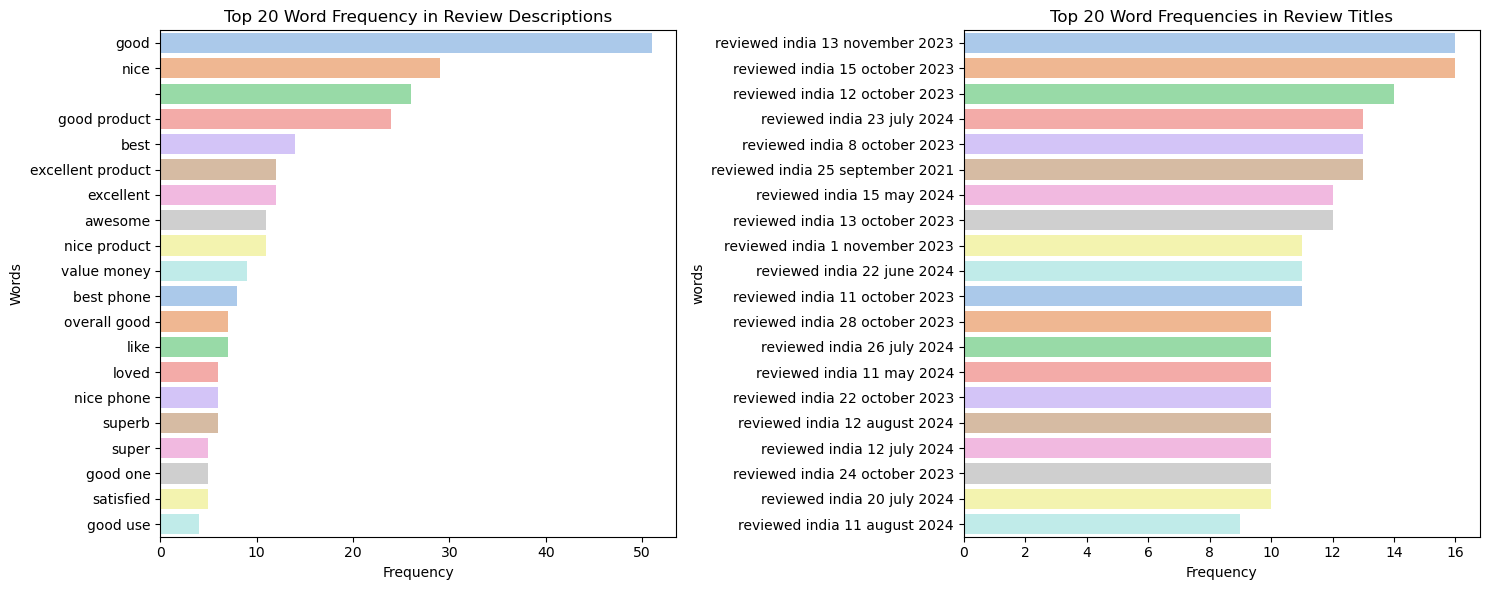

In [92]:
#create a figure for subplots

fig, axs=plt.subplots(1,2, figsize=(15, 6))

#plot for review description

word_freq_desc=Counter(df["reviewDescription"])
freq_df_desc=pd.DataFrame(word_freq_desc.items(),columns=['word','frequency'])


sns.barplot(x='frequency',y='word',data=freq_df_desc.sort_values(by='frequency',ascending=False)
.head(20),ax=axs[0],palette='pastel')
axs[0].set_title('Top 20 Word Frequency in Review Descriptions')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Words')


#plot for review title

word_freq_title=Counter(df["reviewedIn"])
freq_df_title=pd.DataFrame(word_freq_title.items(),columns=['word','frequency'])
sns.barplot(x='frequency',y='word',data=freq_df_title.sort_values(by='frequency',
ascending=False).head(20)
,ax=axs[1] ,palette="pastel")  
axs[1].set_title("Top 20 Word Frequencies in Review Titles")
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('words')

#Adjust layout for better visual spacing

plt.tight_layout()
plt.show()

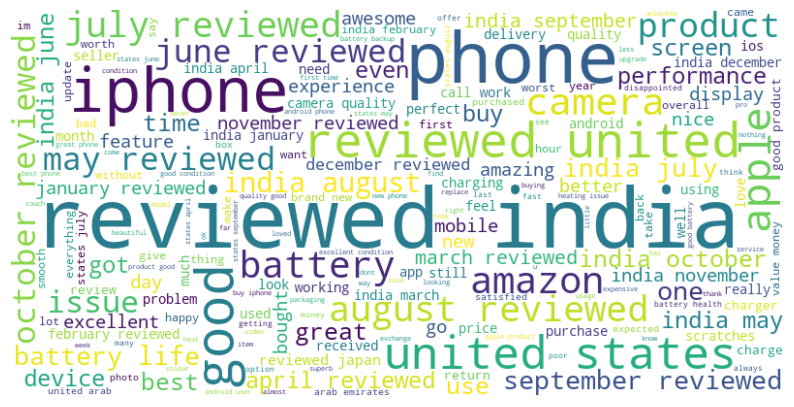

In [95]:
text_data=pd.concat([df['reviewTitle'],df['reviewDescription'],df['reviewedIn']])
cleaned_texts=text_data.apply(text_preprocessing)
combined_text=' '.join(cleaned_texts)
wordcloud =WordCloud(width=800,height=400,background_color='white').generate(combined_text)


#Display the Word Cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')  #Remove axis
plt.show()